In [26]:
import os
import pandas as p트
import numpy as np
import seaborn as sns
import tensorflow as tensorflow
import pprint
import matplotlib.pyplot as plt

In [27]:
def load_data():
    csv_path_trade = os.path.join('./stocks/','trade_train.csv')
    csv_path_stock = os.path.join('./stocks/','stocks.csv')

    return pd.read_csv(csv_path_trade),pd.read_csv(csv_path_stock)

trade_data,stock_data = load_data()
trade_data['그룹내_매수여부']

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
30195    Y
30196    Y
30197    Y
30198    Y
30199    Y
Name: 그룹내_매수여부, Length: 30200, dtype: object

In [28]:
trade_data['그룹내_매수여부']=np.where(trade_data['그룹내_매수여부']=='Y',1,0)
trade_data['그룹내_매도여부']=np.where(trade_data['그룹내_매도여부']=='Y',1,0)

trade_data.info()
trade_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30200 non-null  int64 
 1   기준년월        30200 non-null  int64 
 2   그룹번호        30200 non-null  object
 3   그룹내고객수      30200 non-null  int64 
 4   종목번호        30200 non-null  object
 5   그룹내_매수여부    30200 non-null  int32 
 6   그룹내_매도여부    30200 non-null  int32 
 7   매수고객수       30200 non-null  int64 
 8   매도고객수       30200 non-null  int64 
 9   평균매수수량      30200 non-null  int64 
 10  평균매도수량      30200 non-null  int64 
 11  매수가격_중앙값    30200 non-null  int64 
 12  매도가격_중앙값    30200 non-null  int64 
dtypes: int32(2), int64(9), object(2)
memory usage: 2.8+ MB


,Unnamed: 0,기준년월,그룹번호,그룹내고객수,종목번호,그룹내_매수여부,그룹내_매도여부,매수고객수,매도고객수,평균매수수량,평균매도수량,매수가격_중앙값,매도가격_중앙값
0,0,201907,MAD01,288,A000660,1,1,7,17,19,234,74800,78500
1,1,201907,MAD01,288,A001820,1,1,3,4,533,154,47385,46700
2,2,201907,MAD01,288,A004020,1,1,3,3,409,528,41411,40000
3,3,201907,MAD01,288,A005380,1,1,4,3,323,451,140602,140628
4,4,201907,MAD01,288,A005930,1,1,13,19,34,101,45350,46850


In [29]:
stock_data.info()
stock_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286061 entries, 0 to 286060
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          286061 non-null  int64 
 1   기준일자           286061 non-null  int64 
 2   종목번호           286061 non-null  object
 3   종목명            286061 non-null  object
 4   20년7월TOP3대상여부  286061 non-null  object
 5   시장구분           286061 non-null  object
 6   표준산업구분코드_대분류   286061 non-null  object
 7   표준산업구분코드_중분류   286061 non-null  object
 8   표준산업구분코드_소분류   286061 non-null  object
 9   종목시가           286061 non-null  int64 
 10  종목고가           286061 non-null  int64 
 11  종목저가           286061 non-null  int64 
 12  종목종가           286061 non-null  int64 
 13  거래량            286061 non-null  int64 
 14  거래금액_만원단위      286061 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 32.7+ MB


,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
0,0,20190701,A000020,동화약품,N,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,9680,9840,9680,9710,31341,30581
1,1,20190701,A000080,하이트진로,N,코스피,제조업,음료 제조업,알코올음료 제조업,20550,20550,20200,20300,127186,258535
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
3,3,20190701,A000120,CJ대한통운,N,코스피,운수 및 창고업,육상운송 및 파이프라인 운송업,도로 화물 운송업,136500,137000,133000,136000,62513,846100
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896


In [30]:
months=trade_data['기준년월']
months=np.array(months)

<AxesSubplot:xlabel='기준년월'>

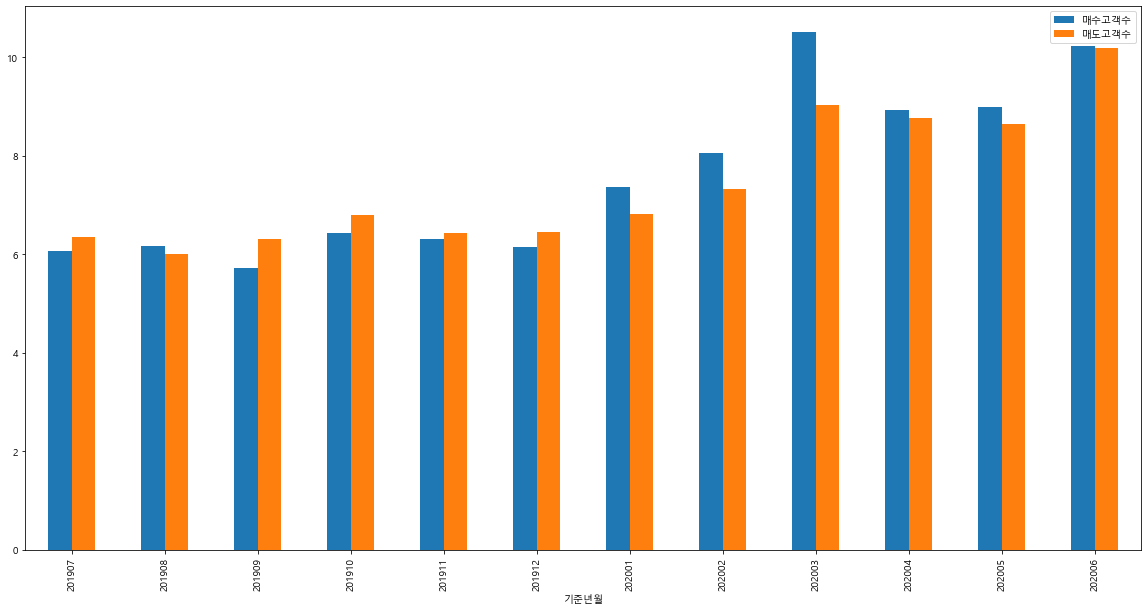

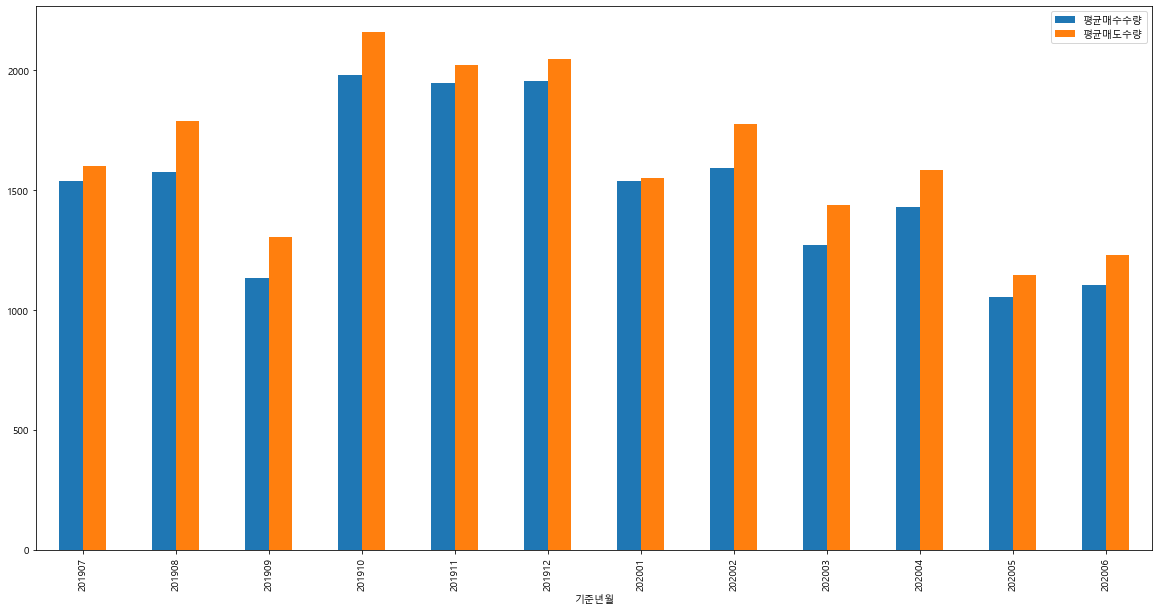

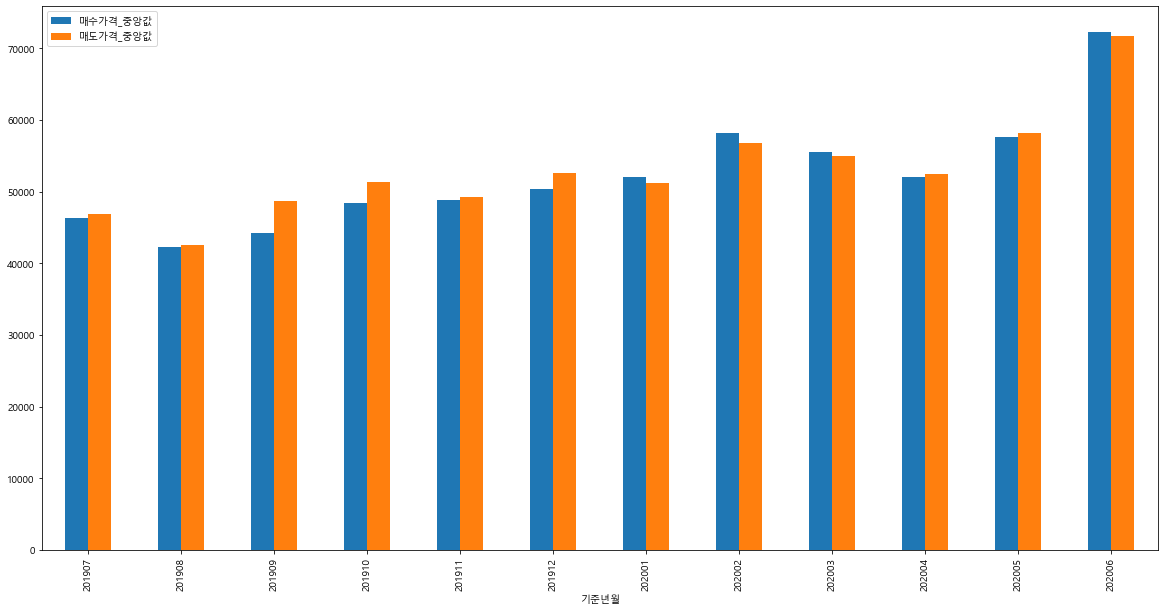

In [31]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import numpy as np
#trade_data['기준년월']=np.array(trade_data['기준년월'],dtype=np.int64)
#trade_data.info()
trade_data[['기준년월','매수고객수','매도고객수']].groupby(['기준년월']).mean().reset_index().plot(kind='bar',x='기준년월',figsize=(20,10))
trade_data[['기준년월','평균매수수량','평균매도수량']].groupby(['기준년월']).mean().reset_index().plot(kind='bar',x='기준년월',figsize=(20,10))
trade_data[['기준년월','매수가격_중앙값','매도가격_중앙값']].groupby(['기준년월']).mean().reset_index().plot(kind='bar',x='기준년월',figsize=(20,10))


#trade_data[['기준년월','매수고객수']].plot(kind='bar',x='기준년월',y='매수고객수',figsize=(20,15))


<AxesSubplot:xlabel='그룹번호'>

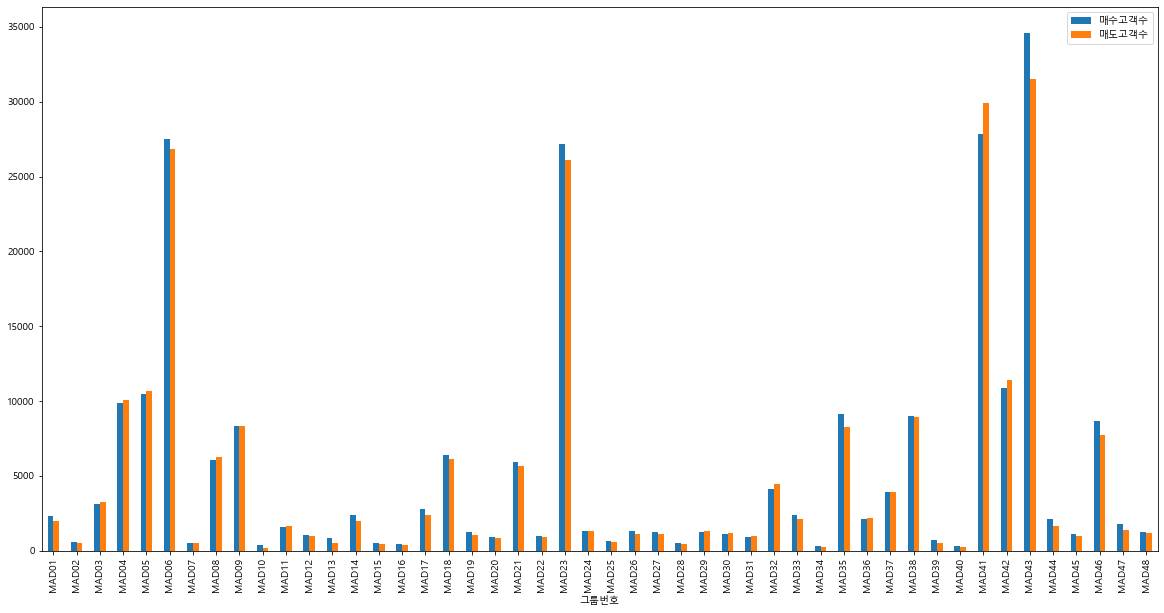

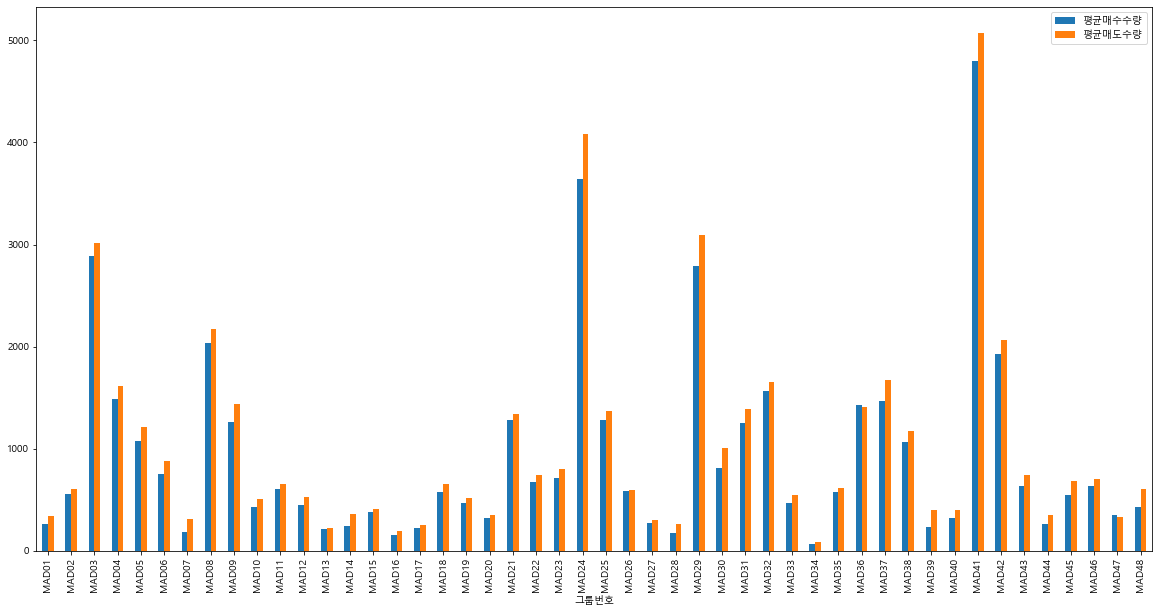

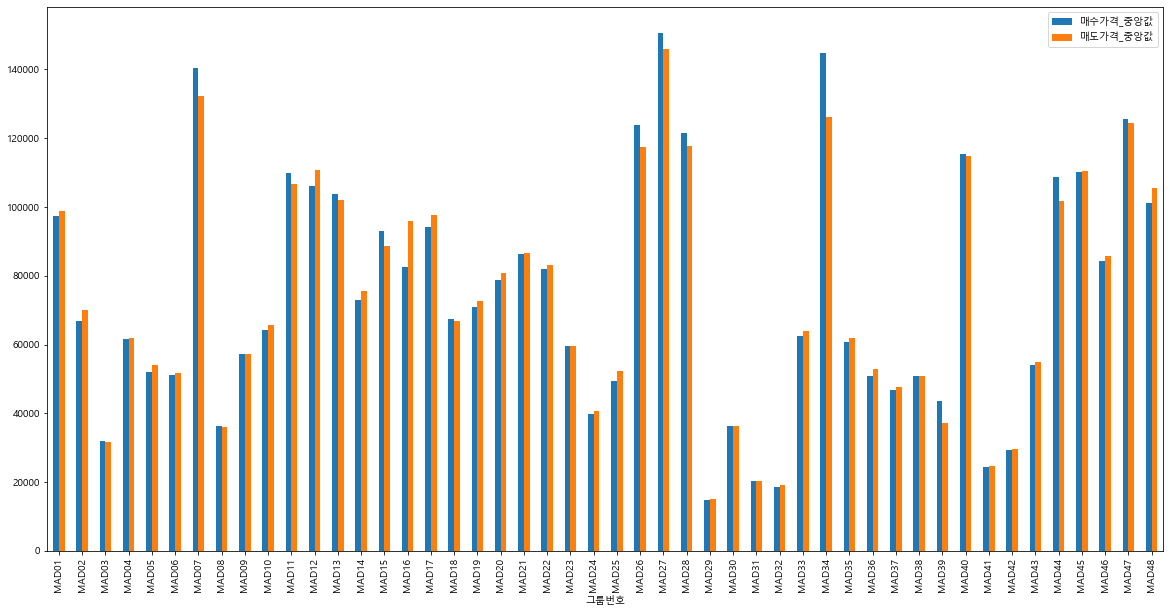

In [32]:
trade_data[['그룹번호','매수고객수','매도고객수']].groupby(['그룹번호']).sum().reset_index().plot(kind='bar',x='그룹번호',figsize=(20,10))
trade_data[['그룹번호','평균매수수량','평균매도수량']].groupby(['그룹번호']).mean().reset_index().plot(kind='bar',x='그룹번호',figsize=(20,10))
trade_data[['그룹번호','매수가격_중앙값','매도가격_중앙값']].groupby(['그룹번호']).mean().reset_index().plot(kind='bar',x='그룹번호',figsize=(20,10))

In [33]:
#trade_data[['종목번호','매수고객수','매도고객수']].groupby(['종목번호']).sum().reset_index().plot(kind='bar',x='종목번호',figsize=(20,10))
#trade_data[['종목번호','평균매수수량','평균매도수량']].groupby(['종목번호']).sum().reset_index().plot(kind='bar',x='종목번호',figsize=(20,10))
#trade_data[['종목번호','매수가격_중앙값','매도가격_중앙값']].groupby(['종목번호']).sum().reset_index().plot(kind='bar',x='종목번호',figsize=(20,10))

In [40]:
trade_data.describe()
print('test')
print("git")

test


<AxesSubplot:xlabel='표준산업구분코드_대분류'>

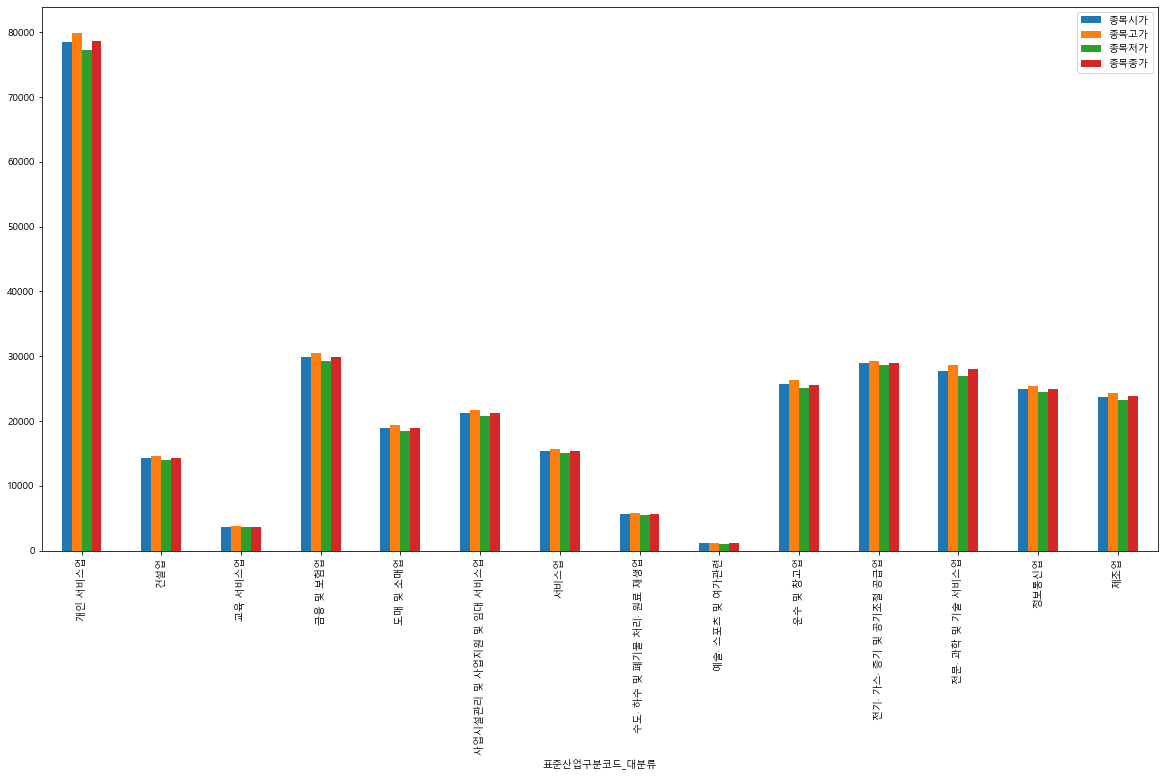

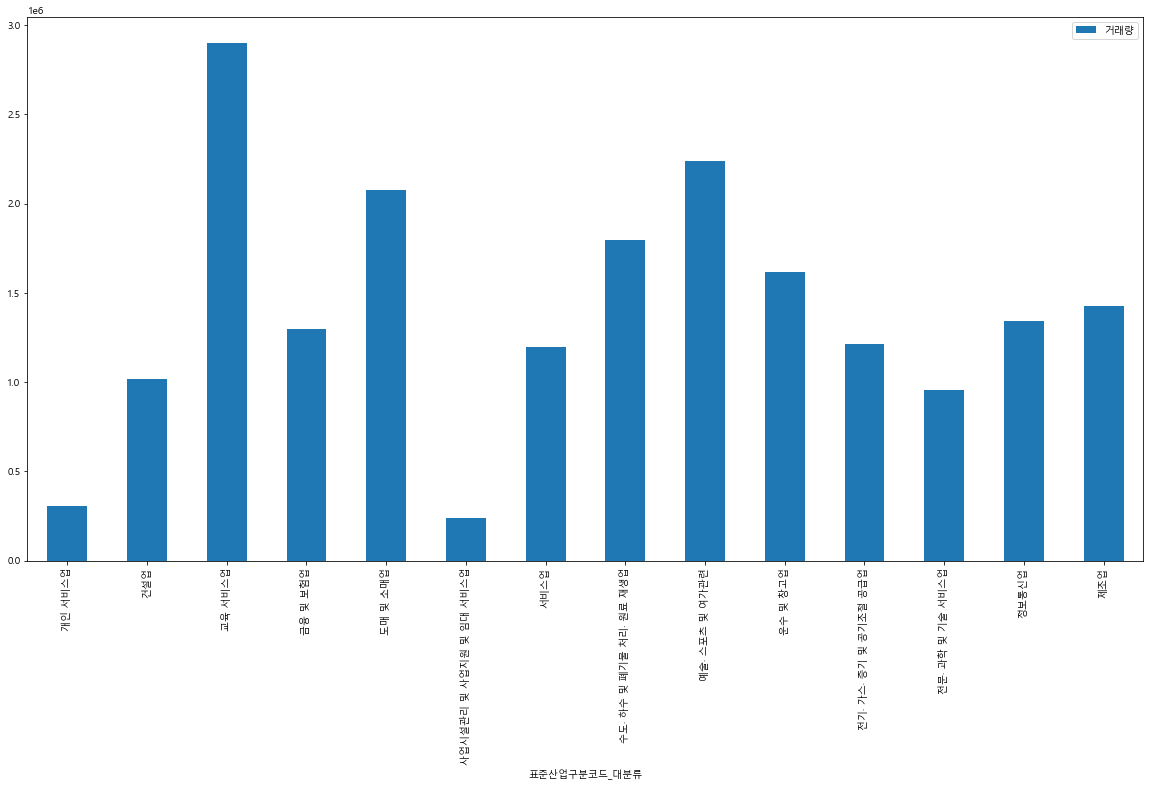

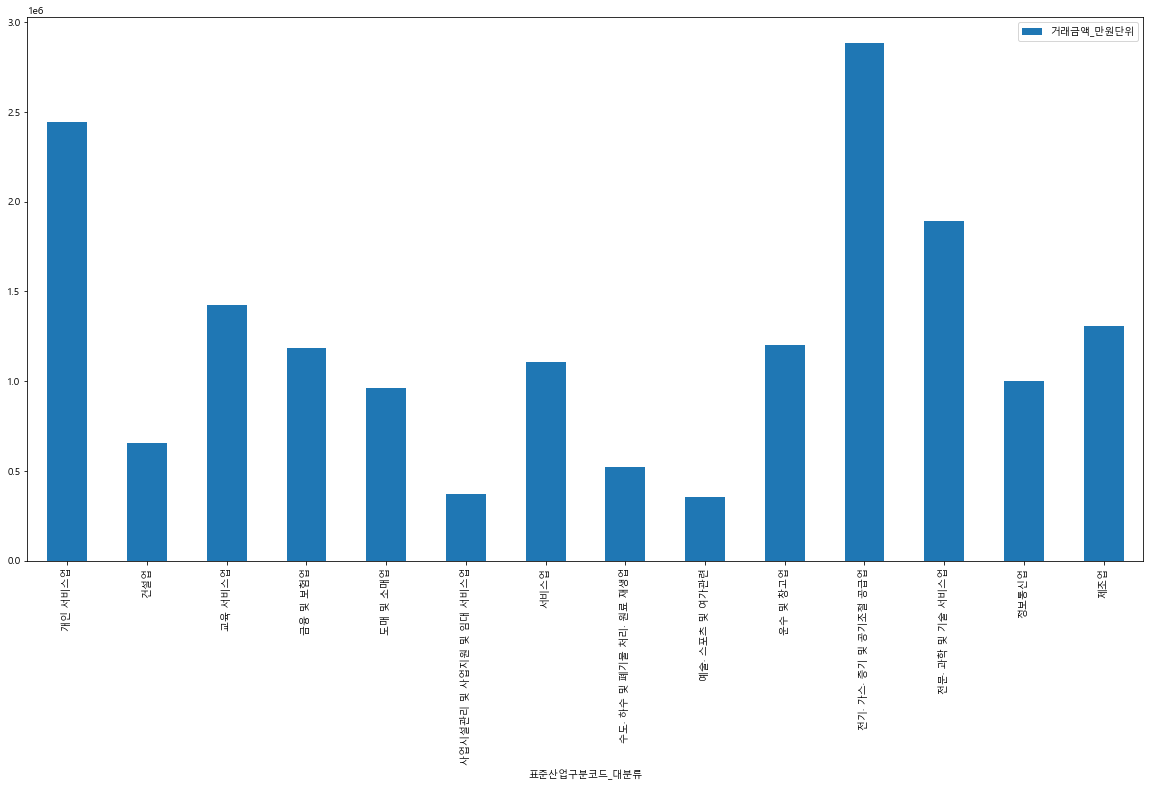

In [35]:
stock_data[['표준산업구분코드_대분류','종목시가','종목고가','종목저가','종목종가']].groupby(['표준산업구분코드_대분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_대분류',figsize=(20,10))
stock_data[['표준산업구분코드_대분류','거래량']].groupby(['표준산업구분코드_대분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_대분류',figsize=(20,10))
stock_data[['표준산업구분코드_대분류','거래금액_만원단위']].groupby(['표준산업구분코드_대분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_대분류',figsize=(20,10))
#trade_data[['그룹번호','평균매수수량','평균매도수량']].groupby(['그룹번호']).mean().reset_index().plot(kind='bar',x='그룹번호',figsize=(20,10))
#trade_data[['그룹번호','매수가격_중앙값','매도가격_중앙값']].groupby(['그룹번호']).mean().reset_index().plot(kind='bar',x='그룹번호',figsize=(20,10))

<AxesSubplot:xlabel='표준산업구분코드_중분류'>

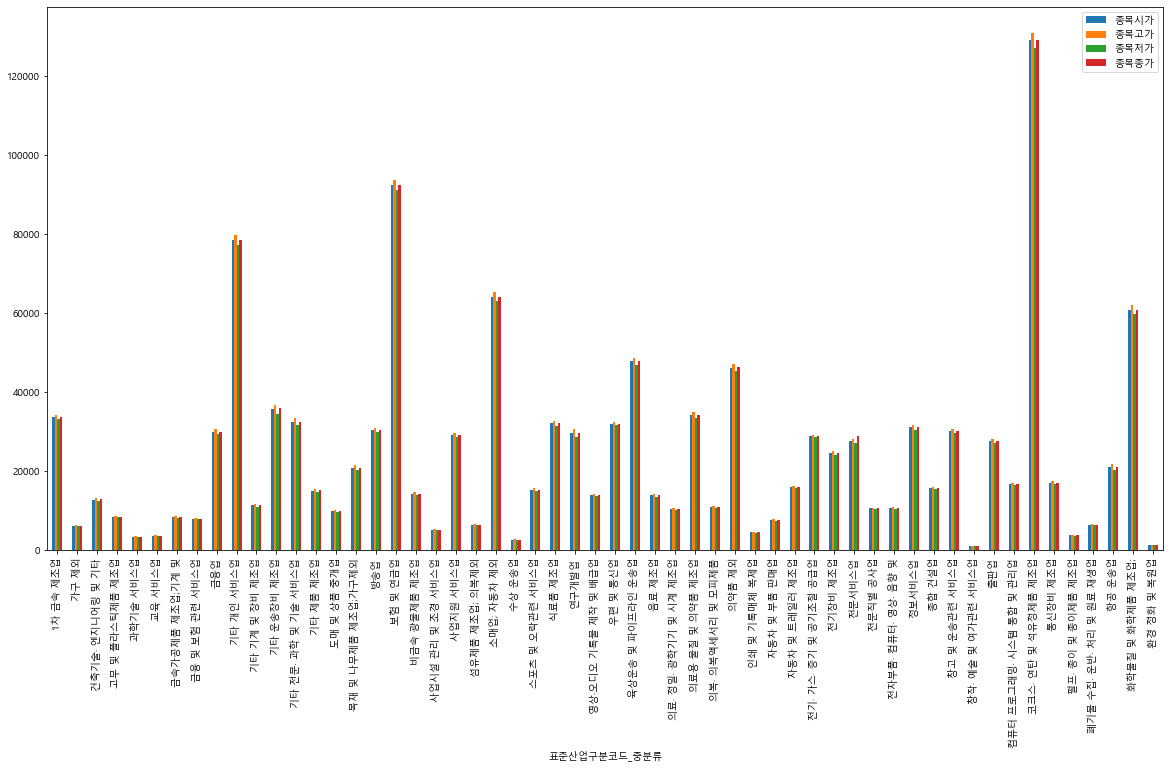

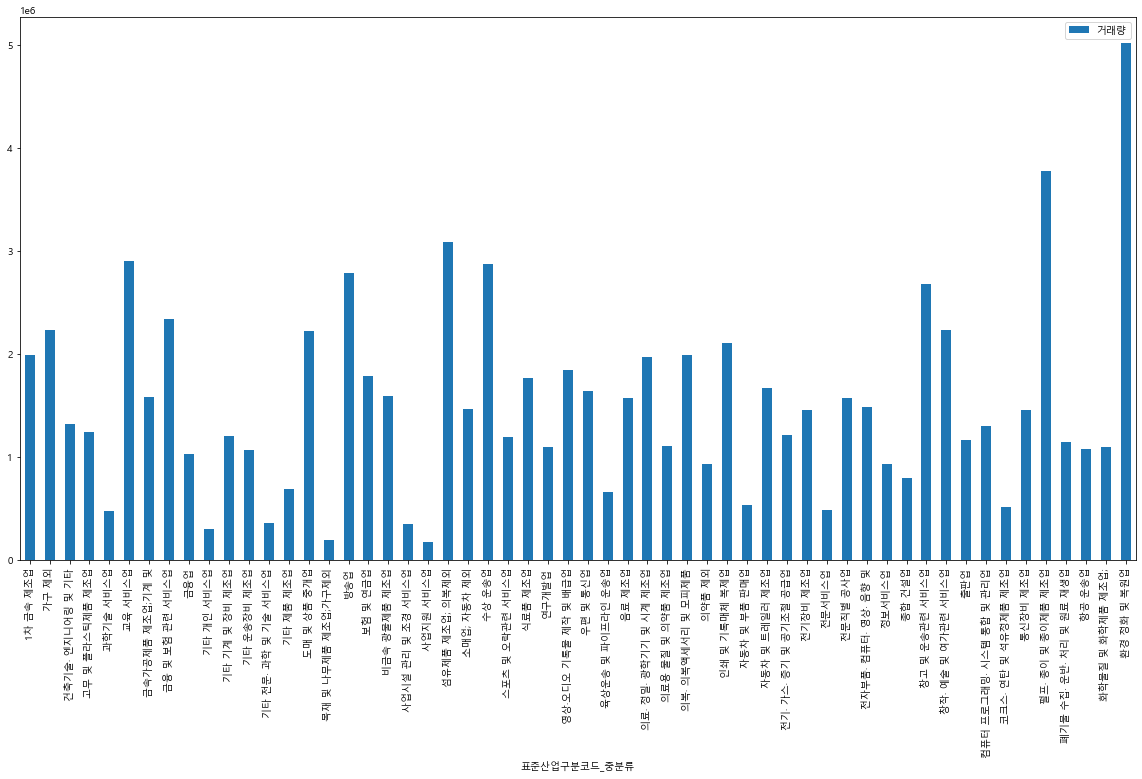

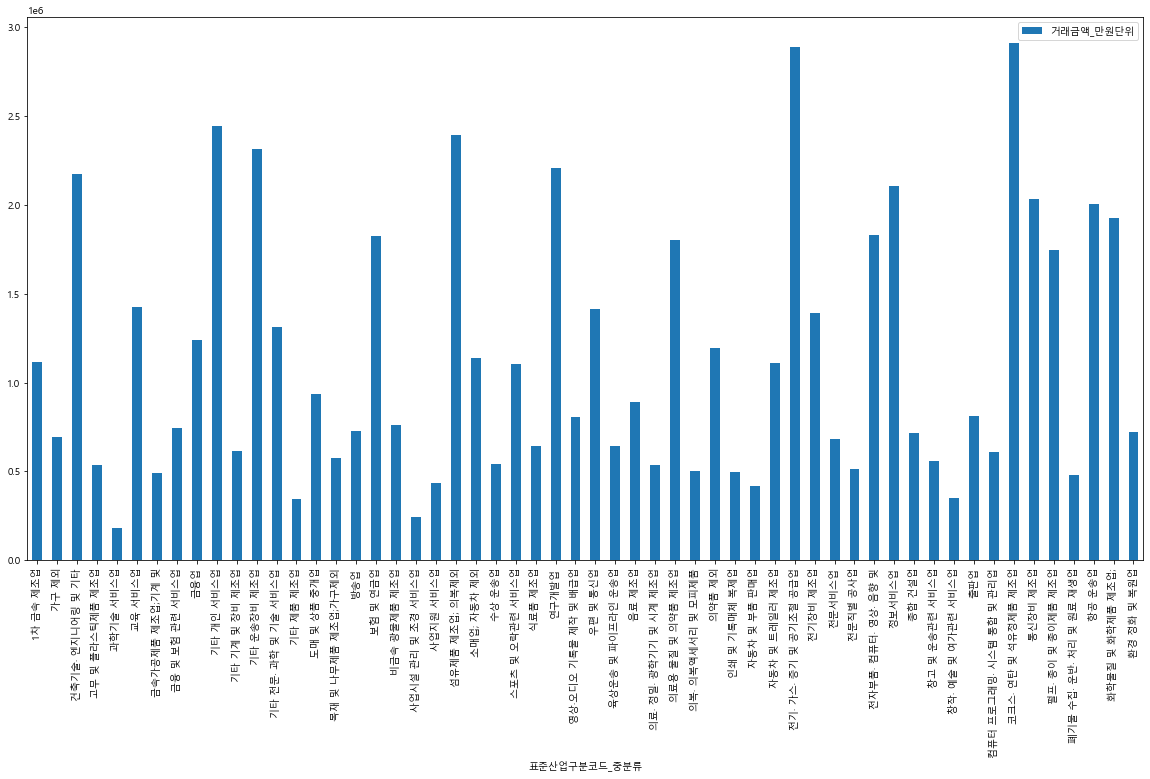

In [36]:

stock_data[['표준산업구분코드_중분류','종목시가','종목고가','종목저가','종목종가']].groupby(['표준산업구분코드_중분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_중분류',figsize=(20,10))
stock_data[['표준산업구분코드_중분류','거래량']].groupby(['표준산업구분코드_중분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_중분류',figsize=(20,10))
stock_data[['표준산업구분코드_중분류','거래금액_만원단위']].groupby(['표준산업구분코드_중분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_중분류',figsize=(20,10))

In [38]:

stock_data[['표준산업구분코드_소분류','종목시가','종목고가','종목저가','종목종가']].groupby(['표준산업구분코드_소분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_소분류',figsize=(20,10))
stock_data[['표준산업구분코드_소분류','거래량']].groupby(['표준산업구분코드_소분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_소분류',figsize=(20,10))
중소소tock_data[['표준산업구분코드_소분류','거래금액_만원단위']].groupby(['표준산업구분코드_소분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_소분류',figsize=(20,10))

NameError: name '중소소tock_data' is not defined

In [426]:
test = pd.DataFrame(stock_data)
test= test.drop_duplicates(['종목명'],keep='last')

In [428]:
test[test['종목번호']=='A009150']

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
285133,285133,20200728,A009150,삼성전기,N,코스피,제조업,통신장비 제조업,전자부품 제조업,142000,146000,141500,144500,1373437,19775790


In [452]:
#stock_data[stock_data['표준산업구분코드_소분류']=='그외 기타 개인 서비스업']['종목번호'].unique()
array=trade_data[trade_data['그룹번호']=='MAD07']['종목번호']
arr=[]
arr_group_=[]
arr_group_2=[]
arr_group_3=[]
arr3= np.array(trade_data['그룹번호'].unique())
arr2=[]
print(arr3)
# np.zeros(10,10)
# arr_group_2=np.zeros(len(arr3),1)
# arr_group_3=np.zeros(len(arr3),1)

for i in arr3:
    arr2.append(trade_data[trade_data['그룹번호']==i]['종목번호'].unique())
print(len(arr2[6]), arr2[6])



# for i in range(len(arr2)):
#     print(arr3[i])
#     for j in arr2[i]:
#         arr_group_.append(test[test['종목번호']==j]['표준산업구분코드_대분류'].unique())
#         arr_group_2.append(test[test['종목번호']==j]['표준산업구분코드_중분류'].unique())
#         arr_group_3.append(test[test['종목번호']==j]['표준산업구분코드_소분류'].unique())
#       #  print(stock_data[stock_data['종목번호']==j]['표준산업구분코드_대분류'].unique())
# for i in arr3:
#     arr.append(stock_data[stock_data['종목번호']==i][['표준산업구분코드_대분류','표준산업구분코드_중분류','표준산업구분코드_소분류']])
# print(len(arr2))
# arr2=np.array(arr2)
# arr2.unique()
# print(arr2[5].unique())


['MAD01' 'MAD02' 'MAD03' 'MAD04' 'MAD05' 'MAD06' 'MAD07' 'MAD08' 'MAD09'
 'MAD10' 'MAD11' 'MAD12' 'MAD13' 'MAD14' 'MAD15' 'MAD16' 'MAD17' 'MAD18'
 'MAD19' 'MAD20' 'MAD21' 'MAD22' 'MAD23' 'MAD24' 'MAD25' 'MAD26' 'MAD27'
 'MAD28' 'MAD29' 'MAD30' 'MAD31' 'MAD32' 'MAD33' 'MAD34' 'MAD35' 'MAD36'
 'MAD37' 'MAD38' 'MAD39' 'MAD41' 'MAD42' 'MAD43' 'MAD44' 'MAD45' 'MAD46'
 'MAD47' 'MAD48' 'MAD40']
40 ['A009150' 'A093370' 'A215600' 'A005930' 'A010060' 'A010950' 'A068270'
 'A207940' 'A000660' 'A006400' 'A008350' 'A051910' 'A008770' 'A034220'
 'A090430' 'A096770' 'A005690' 'A012330' 'A066570' 'A096530' 'A180640'
 'A253840' 'A000270' 'A003000' 'A003060' 'A005380' 'A011000' 'A015760'
 'A019170' 'A041960' 'A091990' 'A005490' 'A011070' 'A028050' 'A035720'
 'A007570' 'A010130' 'A011170' 'A084850' 'A090460']


In [449]:
join = pd.merge(trade_data,stock_data)
join_group=[]
for i in arr3:
    print(i)
    join_group.append((join[join['그룹번호']==i]['표준산업구분코드_대분류'].unique()))
    print((join[join['그룹번호']==i]['표준산업구분코드_대분류'].unique()))


MAD01
['제조업' '도매 및 소매업' '금융 및 보험업' '정보통신업' '전문· 과학 및 기술 서비스업'
 '전기· 가스· 증기 및 공기조절 공급업' '운수 및 창고업' '사업시설관리 및 사업지원 및 임대 서비스업' '건설업' '서비스업']
MAD02
['제조업' '도매 및 소매업' '금융 및 보험업' '정보통신업' '전문· 과학 및 기술 서비스업' '건설업'
 '전기· 가스· 증기 및 공기조절 공급업' '운수 및 창고업']
MAD03
['제조업' '금융 및 보험업' '정보통신업' '도매 및 소매업' '건설업' '전문· 과학 및 기술 서비스업' '운수 및 창고업'
 '전기· 가스· 증기 및 공기조절 공급업' '교육 서비스업' '서비스업' '예술· 스포츠 및 여가관련'
 '수도· 하수 및 폐기물 처리· 원료 재생업']
MAD04
['제조업' '도매 및 소매업' '금융 및 보험업' '정보통신업' '건설업' '전문· 과학 및 기술 서비스업' '운수 및 창고업'
 '전기· 가스· 증기 및 공기조절 공급업' '교육 서비스업' '서비스업' '수도· 하수 및 폐기물 처리· 원료 재생업'
 '예술· 스포츠 및 여가관련']
MAD05
['제조업' '도매 및 소매업' '금융 및 보험업' '정보통신업' '건설업' '전문· 과학 및 기술 서비스업' '운수 및 창고업'
 '전기· 가스· 증기 및 공기조절 공급업' '사업시설관리 및 사업지원 및 임대 서비스업' '교육 서비스업' '서비스업'
 '수도· 하수 및 폐기물 처리· 원료 재생업' '예술· 스포츠 및 여가관련' '개인 서비스업']
MAD06
['제조업' '도매 및 소매업' '금융 및 보험업' '정보통신업' '건설업' '전문· 과학 및 기술 서비스업' '운수 및 창고업'
 '전기· 가스· 증기 및 공기조절 공급업' '사업시설관리 및 사업지원 및 임대 서비스업' '교육 서비스업' '서비스업'
 '수도· 하수 및 폐기물 처리· 원료 재생업' '예술· 스포츠 및 여가관련' '개인 서비스업']
MAD07
['제조업' '도매 및 소매

In [453]:
arr2[14]

array(['A005930', 'A034220', 'A218410', 'A010950', 'A000660', 'A006400',
       'A009150', 'A028300', 'A068270', 'A005935', 'A011790', 'A096770',
       'A009830', 'A035720', 'A066570', 'A009540', 'A247540', 'A003230',
       'A005380', 'A003000', 'A010620', 'A011170', 'A050890'],
      dtype=object)

In [282]:

stock_data[['표준산업구분코드_중분류','종목시가','종목고가','종목저가','종목종가']].groupby([stock_data['표준산업구분코드_대분류']=='제조업']['표준산업구분코드_중분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_중분류',figsize=(20,10))
stock_data[['표준산업구분코드_중분류','거래량']].groupby(['표준산업구분코드_중분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_중분류',figsize=(20,10))
stock_data[['표준산업구분코드_중분류','거래금액_만원단위']].groupby(['표준산업구분코드_중분류']).mean().reset_index().plot(kind='bar',x='표준산업구분코드_중분류',figsize=(20,10))

SyntaxError: positional argument follows keyword argument (<ipython-input-282-e6018be51875>, line 1)

In [ ]:
manu=[]
for i in range(length):
    if datas[i]=='제조업':
        manu.append(stock_data)


In [255]:
test = pd.DataFrame(stock_data)
print(test.drop_duplicates(['종목명'],keep='last'))



index      기준일자     종목번호       종목명 20년7월TOP3대상여부 시장구분 표준산업구분코드_대분류  \
284974  284974  20200728  A000020      동화약품             N  코스피          제조업   
284975  284975  20200728  A000080     하이트진로             N  코스피          제조업   
284976  284976  20200728  A000100      유한양행             Y  코스피          제조업   
284977  284977  20200728  A000120    CJ대한통운             N  코스피     운수 및 창고업   
284978  284978  20200728  A000140  하이트진로홀딩스             Y  코스피     금융 및 보험업   
...        ...       ...      ...       ...           ...  ...          ...   
286056  286056  20200728  A336370     두산솔루스             N  코스피          제조업   
286057  286057  20200728  A33637K   두산솔루스1우             N  코스피          제조업   
286058  286058  20200728  A33637L  두산솔루스2우B             N  코스피          제조업   
286059  286059  20200728  A344820   케이씨씨글라스             N  코스피          제조업   
286060  286060  20200728  A353810     이지바이오             Y  코스닥          제조업   

            표준산업구분코드_중분류       표준산업구분코드_소분류    종목시가    종목고가 

In [256]:
test = pd.DataFrame(trade_data)
print(test.drop_duplicates(['종목번호'],keep='last'))

Unnamed: 0    기준년월   그룹번호  그룹내고객수     종목번호  그룹내_매수여부  그룹내_매도여부  매수고객수  \
108           108  201907  MAD04     776  A171090         1         1      3   
185           185  201907  MAD05     890  A312610         1         1      6   
1030         1030  201907  MAD41     932  A006890         1         1      3   
1079         1079  201907  MAD41     932  A037330         1         1      6   
1099         1099  201907  MAD41     932  A058630         1         1      7   
...           ...     ...    ...     ...      ...       ...       ...    ...   
30195       30195  202006  MAD48     163  A207940         1         1      3   
30196       30196  202006  MAD48     163  A272210         1         1      3   
30197       30197  202006  MAD48     163  A285130         1         1      6   
30198       30198  202006  MAD48     163  A316140         1         1      5   
30199       30199  202006  MAD48     163  A336260         1         1      5   

       매도고객수  평균매수수량  평균매도수량  매수가격_중앙값  매도가격_중

In [275]:
stock_data[stock_data['20년7월TOP3대상여부']=='Y']

,index,기준일자,종목번호,종목명,20년7월TOP3대상여부,시장구분,표준산업구분코드_대분류,표준산업구분코드_중분류,표준산업구분코드_소분류,종목시가,종목고가,종목저가,종목종가,거래량,거래금액_만원단위
2,2,20190701,A000100,유한양행,Y,코스피,제조업,의료용 물질 및 의약품 제조업,의약품 제조업,259000,267500,250000,251500,395757,10139357
4,4,20190701,A000140,하이트진로홀딩스,Y,코스피,금융 및 보험업,금융업,기타 금융업,9060,9190,8910,9000,7661,6896
11,11,20190701,A000440,중앙에너비스,Y,코스닥,도매 및 소매업,도매 및 상품 중개업,기타 전문 도매업,7330,7400,7190,7230,17724,12858
13,13,20190701,A000660,SK하이닉스,Y,코스피,제조업,전자부품· 컴퓨터· 영상· 음향 및,반도체 제조업,71000,71000,69700,70000,3538183,24875267
17,17,20190701,A000885,한화우,Y,코스피,제조업,의약품 제외,기타 화학제품 제조업,31700,31800,30850,31000,20658,64693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286006,286006,20200728,A290550,디케이티,Y,코스닥,제조업,통신장비 제조업,전자부품 제조업,23000,23300,22500,22650,207283,472776
286031,286031,20200728,A307930,컴퍼니케이,Y,코스닥,금융 및 보험업,금융업,기타 금융업,7120,7240,7090,7110,69204,49469
286041,286041,20200728,A317530,캐리소프트,Y,코스닥,정보통신업,영상·오디오 기록물 제작 및 배급업,영화· 비디오물· 방송프로그램 제작 및 배급업,3740,3820,3700,3740,22650,8472
286044,286044,20200728,A317870,엔바이오니아,Y,코스닥,제조업,기타 제품 제조업,그외 기타 제품 제조업,7100,7140,6900,6970,172179,120190


In [141]:
import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]